In [99]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

In [100]:
A = 0.25
m = 1.0

\begin{equation}
\alpha = \sqrt{k^2+m^2}
\end{equation}

In [101]:
def alpha_f(k):
    return np.sqrt(k**2 + m**2)

\begin{equation}
\beta = Fk + Gm
\end{equation}

In [102]:
def beta_f(k):
    return F_f(k) * k + G_f(k) * m

\begin{equation}
F(k)=A/(2\sqrt{\pi})e^{-k^2/4}
\end{equation}

In [103]:
def F_f(k):
    return A / (2 * np.sqrt(np.pi)) * np.exp(-k ** 2 / 4)

\begin{equation}
G(k)=-A/(2\sqrt{\pi})e^{-k^2/4}
\end{equation}

In [104]:
def G_f(k):
    return - A / (2 * np.sqrt(np.pi)) * np.exp(-k ** 2 / 4)

\begin{equation}
g_1(k) \equiv \left(\frac{F\alpha-\beta}{2\alpha}\right)\left(-\frac{k+\alpha}{m}\right)
\end{equation}

In [105]:
def g_1_f(k):
    return ((F_f(k) * alpha_f(k) - beta_f(k)) / (2 * alpha_f(k))) * (- (k + alpha_f(k)) / m)

\begin{equation}
g_2(k)\equiv \left(\frac{F\alpha+\beta}{2\alpha}\right)\left(-\frac{k-\alpha}{m}\right)
\end{equation}

In [106]:
def g_2_f(k):
    return ((F_f(k) * alpha_f(k) + beta_f(k)) / (2 * alpha_f(k))) * (-(k - alpha_f(k)) / m)

\begin{equation}
g_3(k) \equiv \left(\frac{F\alpha-\beta}{2\alpha}\right)
\end{equation}

In [107]:
def g_3_f(k):
    return (F_f(k) * alpha_f(k) - beta_f(k)) / (2 * alpha_f(k))

\begin{equation}
g_4(k) \equiv \left(\frac{F\alpha + \beta}{2\alpha}\right)
\end{equation}

In [108]:
def g_4_f(k):
    return (F_f(k) * alpha_f(k) + beta_f(k)) / (2 * alpha_f(k))

\begin{equation}
h_1(k) \equiv -\alpha - k(x/t)
\end{equation}

In [109]:
def h_1_f(k, x, t):
    return - alpha_f(k) - k * (x/t)

\begin{equation}
h_2(k) \equiv \alpha - k(x/t)
\end{equation}

In [110]:
def h_2_f(k, x, t):
    return alpha_f(k) - k * (x/t)

\begin{equation}
h_1''(k) = -\frac{m^2}{(k^2+m^2)^{3/2}}
\end{equation}

In [111]:
def dd_h_1_f(k):
    return - m ** 2 / (k ** 2 + m ** 2) ** (3 / 2)

\begin{equation}
h_2''(k) = \frac{m^2}{(k^2+m^2)^{3/2}}
\end{equation}

In [112]:
def dd_h_2_f(k):
    return m ** 2 / (k ** 2 + m ** 2) ** (3 / 2)

\begin{equation}
    k_0 = \pm \frac{mx}{\sqrt{t^2-x^2}}, \quad t>x.
\end{equation}

In [113]:
def k_0_f(x, t):
    return - (m*x) / np.sqrt(t**2 - x**2)

\begin{align}
v(x,t) \sim g_1(k_0)\sqrt{\frac{2\pi}{\left|h_1''(k_0)\right|t}} \exp\left(j\left[th_1(k_0) + \frac{\pi}{4}\text{sign}(h_1''(k_0)) \right]\right) + g_2(k_0)\sqrt{\frac{2\pi}{\left|h_2''(k_0)\right|t}} \exp\left(j\left[th_2(k_0) + \frac{\pi}{4}\text{sign}(h_2''(k_0)) \right]\right)
\end{align}

\begin{align}
u(x,t) \sim g_3(k_0)\sqrt{\frac{2\pi}{\left|h_1''(k_0)\right|t}} \exp\left(j\left[th_1(k_0) + \frac{\pi}{4}\text{sign}(h_1''(k_0)) \right]\right) + g_4(k_0)\sqrt{\frac{2\pi}{\left|h_2''(k_0)\right|t}} \exp\left(j\left[th_2(k_0) + \frac{\pi}{4}\text{sign}(h_2''(k_0)) \right]\right)
\end{align}

In [114]:
def v_f(k, x, t):
    
    factor_1 = g_1_f(k) * np.sqrt(2 * np.pi / (np.abs(dd_h_1_f(k)) * t))
    factor_2 = np.exp(1j * (t * h_1_f(k, x, t) - (np.pi/4)))
    term_1 = factor_1 * factor_2
    
    factor_3 = g_2_f(k) * np.sqrt(2 * np.pi / (np.abs(dd_h_2_f(k)) * t))
    factor_4 = np.exp(1j * (t * h_2_f(k, x, t) + (np.pi/4)))
    term_2 = factor_3 * factor_4
    
    return term_1 + term_2

In [115]:
def u_f(k, x, t):
    
    factor_1 = g_3_f(k) * np.sqrt(2 * np.pi / (np.abs(dd_h_1_f(k)) * t))
    factor_2 = np.exp(1j * (t * h_1_f(k, x, t) - (np.pi/4)))
    term_1 = factor_1 * factor_2
    
    factor_3 = g_4_f(k) * np.sqrt(2 * np.pi / (np.abs(dd_h_2_f(k)) * t))
    factor_4 = np.exp(1j * (t * h_2_f(k, x, t) + (np.pi/4)))
    term_2 = factor_3 * factor_4
    
    return term_1 + term_2

In [116]:
def compute_integral(integrand, x, t):
    if integrand == v_f:
        k_0 = k_0_f(x, t)
        return integrand(k_0, x, t)
    elif integrand == u_f:
        k_0 = k_0_f(x, t)
        return integrand(k_0, x, t)

In [117]:
# Generate x and t values
L = 10
x_values = np.linspace(-L, L, 200)
t = 12.5

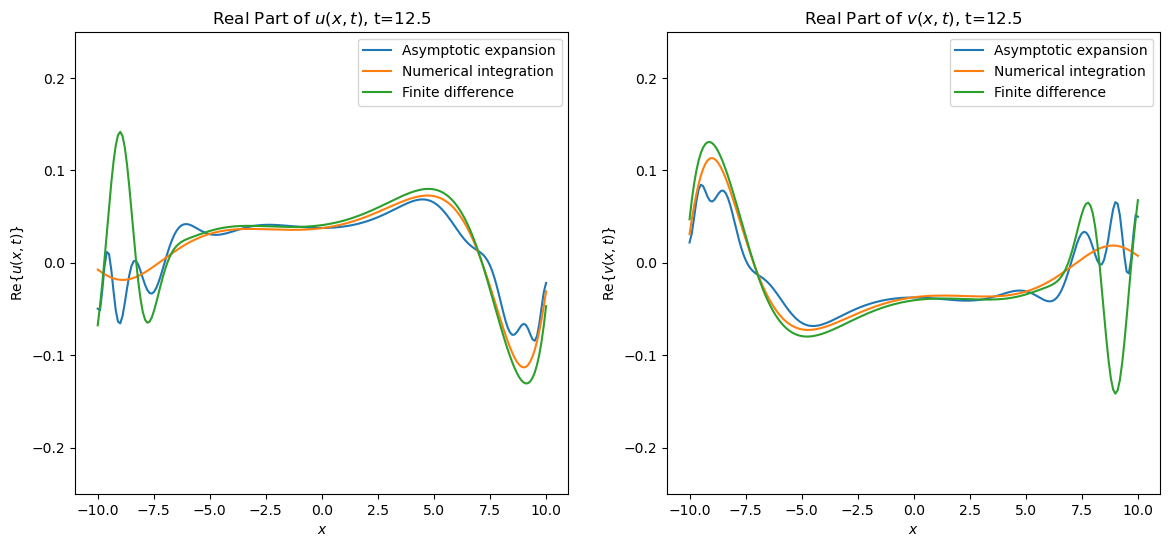

In [118]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Real Part of u(x,t)
u_values = compute_integral(u_f, x_values, t)
u_values_numerical = numerical_integration_u(x_values, t, A, m)
u_values_finite_difference = finite_difference_method(L, t, A, m)[0][-1, :]
ax1.plot(x_values, u_values.real, label=f'Asymptotic expansion')
ax1.plot(x_values, u_values_numerical.real, label=f'Numerical integration')
ax1.plot(x_values, u_values_finite_difference.real, label=f'Finite difference')
    
ax1.set_title(f'Real Part of $u(x,t)$, t={t}')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\text{Re}\left\{u(x,t)\right\}$')
ax1.set_ylim(-A, +A)
ax1.legend()

# Plot the Real Part of v(x,t)
v_values = compute_integral(v_f, x_values, t)
v_values_numerical_integration = numerical_integration_v(x_values, t, A, m)
v_values_finite_difference = finite_difference_method(L, t, A, m)[1][-1, :]
ax2.plot(x_values, v_values.real, label=f'Asymptotic expansion')
ax2.plot(x_values, v_values_numerical_integration.real, label=f'Numerical integration')
ax2.plot(x_values, v_values_finite_difference.real, label=f'Finite difference')
    
ax2.set_title(f'Real Part of $v(x,t)$, t={t}')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\text{Re}\left\{v(x,t)\right\}$')
ax2.set_ylim(-A, +A)
ax2.legend()

plt.show()

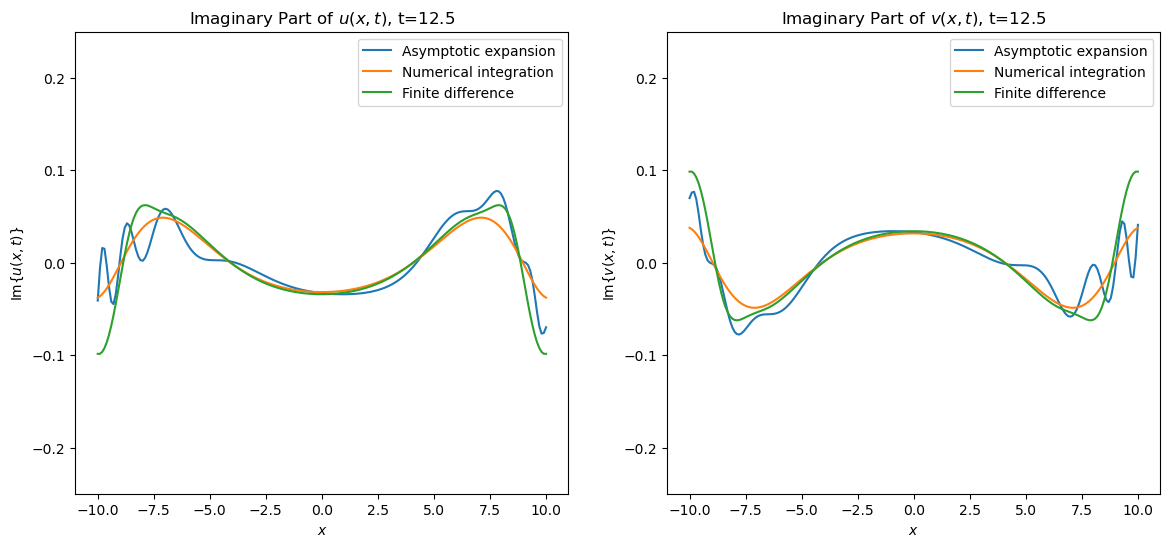

In [119]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Imaginary Part of u(x,t)
u_values = compute_integral(u_f, x_values, t)
u_values_numerical = numerical_integration_u(x_values, t, A, m)
u_values_finite_difference = finite_difference_method(10, t, A, m)[0][-1, :]
ax1.plot(x_values, u_values.imag, label='Asymptotic expansion')
ax1.plot(x_values, u_values_numerical.imag, label='Numerical integration')
ax1.plot(x_values, u_values_finite_difference.imag, label='Finite difference')

ax1.set_title(f'Imaginary Part of $u(x,t)$, t={t}')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\text{Im}\left\{u(x,t)\right\}$')
ax1.set_ylim(-A, +A)
ax1.legend()

# Plot the Imaginary Part of v(x,t)
v_values = compute_integral(v_f, x_values, t)
v_values_numerical = numerical_integration_v(x_values, t, A, m)
v_values_finite_difference = finite_difference_method(10, t, A, m)[1][-1, :]
ax2.plot(x_values, v_values.imag, label='Asymptotic expansion')
ax2.plot(x_values, v_values_numerical.imag, label='Numerical integration')
ax2.plot(x_values, v_values_finite_difference.imag, label='Finite difference')

ax2.set_title(f'Imaginary Part of $v(x,t)$, t={t}')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\text{Im}\left\{v(x,t)\right\}$')
ax2.set_ylim(-A, +A)
ax2.legend()

plt.show()

In [120]:
# Generate x and t values
x_values = np.linspace(-10, 10, 200)
t = 12.6

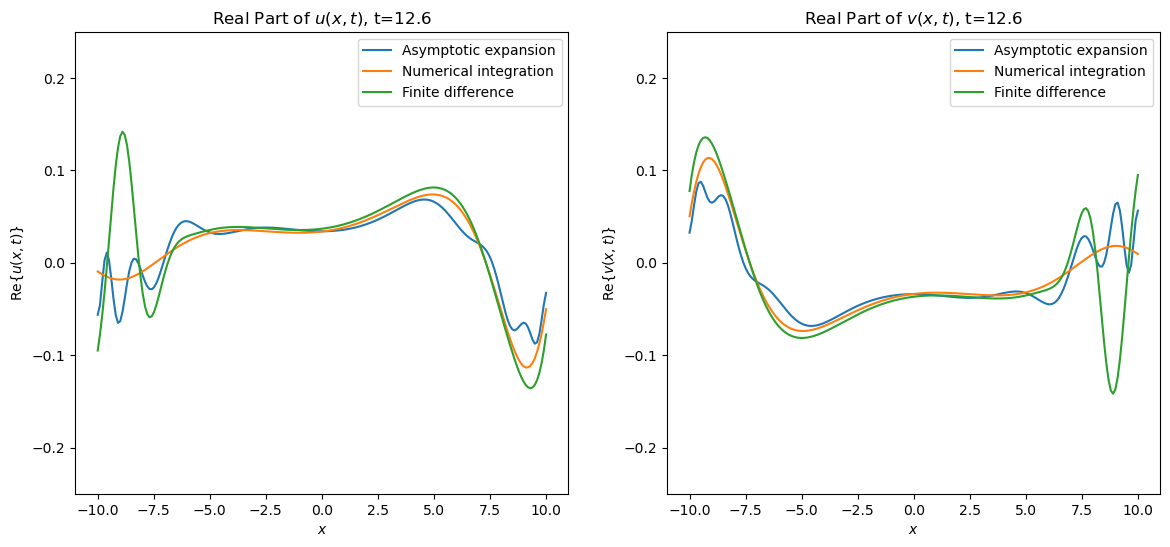

In [121]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Real Part of u(x,t)
u_values = compute_integral(u_f, x_values, t)
u_values_numerical = numerical_integration_u(x_values, t, A, m)
u_values_finite_difference = finite_difference_method(10, t, A, m)[0][-1, :]
ax1.plot(x_values, u_values.real, label=f'Asymptotic expansion')
ax1.plot(x_values, u_values_numerical.real, label=f'Numerical integration')
ax1.plot(x_values, u_values_finite_difference.real, label=f'Finite difference')
    
ax1.set_title(f'Real Part of $u(x,t)$, t={t}')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\text{Re}\left\{u(x,t)\right\}$')
ax1.set_ylim(-A, +A)
ax1.legend()

# Plot the Real Part of v(x,t)
v_values = compute_integral(v_f, x_values, t)
v_values_numerical_integration = numerical_integration_v(x_values, t, A, m)
v_values_finite_difference = finite_difference_method(10, t, A, m)[1][-1, :]
ax2.plot(x_values, v_values.real, label=f'Asymptotic expansion')
ax2.plot(x_values, v_values_numerical_integration.real, label=f'Numerical integration')
ax2.plot(x_values, v_values_finite_difference.real, label=f'Finite difference')
    
ax2.set_title(f'Real Part of $v(x,t)$, t={t}')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\text{Re}\left\{v(x,t)\right\}$')
ax2.set_ylim(-A, +A)
ax2.legend()

plt.show()

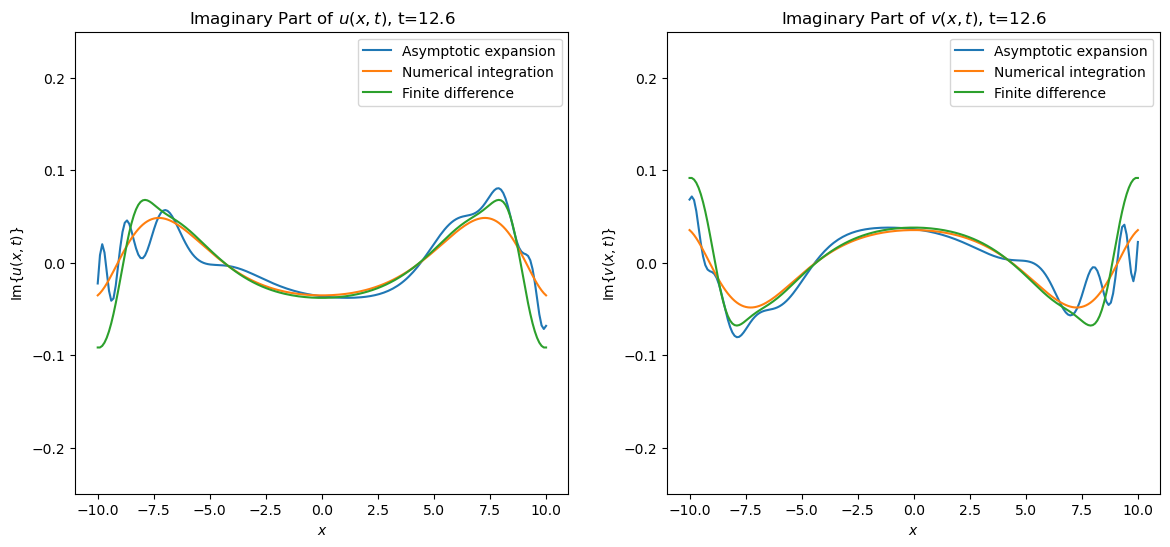

In [122]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Imaginary Part of u(x,t)
u_values = compute_integral(u_f, x_values, t)
u_values_numerical = numerical_integration_u(x_values, t, A, m)
u_values_finite_difference = finite_difference_method(10, t, A, m)[0][-1, :]
ax1.plot(x_values, u_values.imag, label=f'Asymptotic expansion')
ax1.plot(x_values, u_values_numerical.imag, label=f'Numerical integration')
ax1.plot(x_values, u_values_finite_difference.imag, label=f'Finite difference')
    
ax1.set_title(f'Imaginary Part of $u(x,t)$, t={t}')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\text{Im}\left\{u(x,t)\right\}$')
ax1.set_ylim(-A, +A)
ax1.legend()

# Plot the Imaginary Part of v(x,t)
v_values = compute_integral(v_f, x_values, t)
v_values_numerical_integration = numerical_integration_v(x_values, t, A, m)
v_values_finite_difference = finite_difference_method(10, t, A, m)[1][-1, :]
ax2.plot(x_values, v_values.imag, label=f'Asymptotic expansion')
ax2.plot(x_values, v_values_numerical_integration.imag, label=f'Numerical integration')
ax2.plot(x_values, v_values_finite_difference.imag, label=f'Finite difference')
    
ax2.set_title(f'Imaginary Part of $v(x,t)$, t={t}')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\text{Im}\left\{v(x,t)\right\}$')
ax2.set_ylim(-A, +A)
ax2.legend()

plt.show()

In [123]:
# Generate x and t values
x_values = np.linspace(-10, 10, 200)
t = 10.1

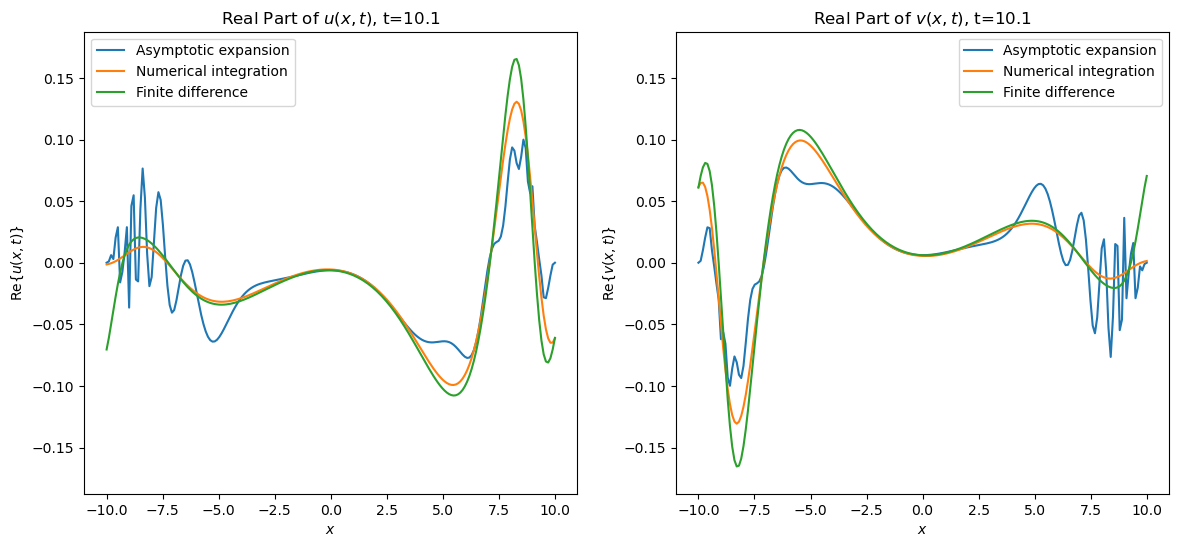

In [124]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Real Part of u(x,t)
u_values = compute_integral(u_f, x_values, t)
u_values_numerical = numerical_integration_u(x_values, t, A, m)
u_values_finite_difference = finite_difference_method(10, t, A, m)[0][-1, :]

ax1.plot(x_values, u_values.real, label=f'Asymptotic expansion')
ax1.plot(x_values, u_values_numerical.real, label=f'Numerical integration')
ax1.plot(x_values, u_values_finite_difference.real, label='Finite difference')

ax1.set_title(f'Real Part of $u(x,t)$, t={t}')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\text{Re}\left\{u(x,t)\right\}$')
ax1.set_ylim(-0.75*A, +0.75*A)
ax1.legend()

# Plot the Real Part of v(x,t)
v_values = compute_integral(v_f, x_values, t)
v_values_numerical = numerical_integration_v(x_values, t, A, m)
v_values_finite_difference = finite_difference_method(10, t, A, m)[1][-1, :]

ax2.plot(x_values, v_values.real, label=f'Asymptotic expansion')
ax2.plot(x_values, v_values_numerical.real, label=f'Numerical integration')
ax2.plot(x_values, v_values_finite_difference.real, label='Finite difference')

ax2.set_title(f'Real Part of $v(x,t)$, t={t}')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\text{Re}\left\{v(x,t)\right\}$')
ax2.set_ylim(-0.75*A, +0.75*A)
ax2.legend()

plt.show()

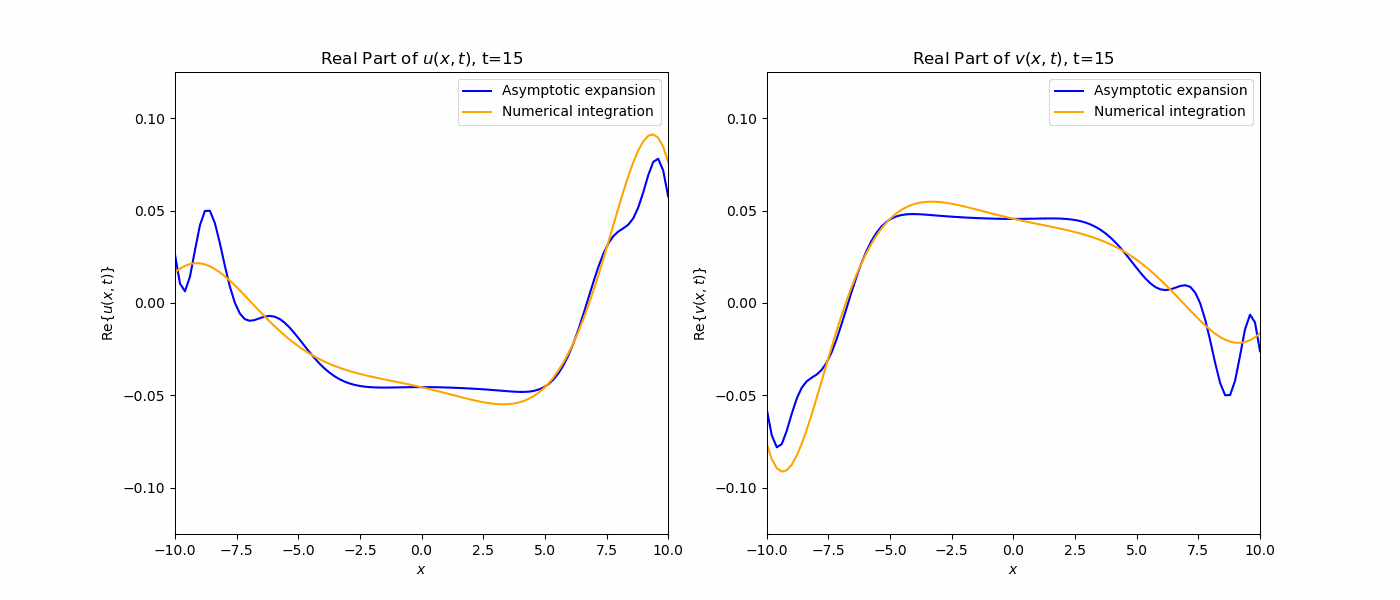

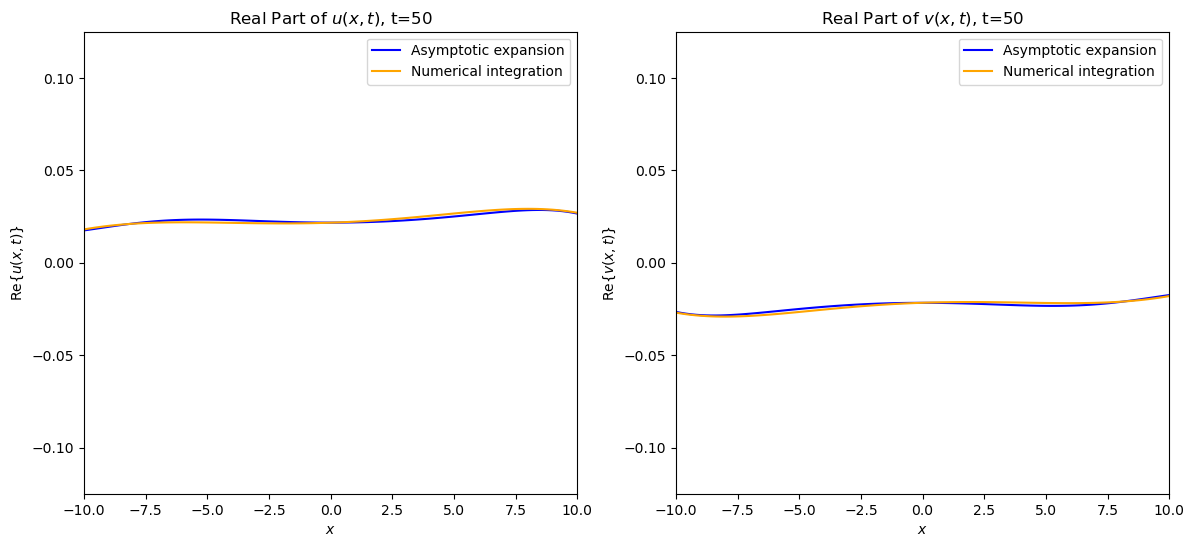

In [125]:
# Time values
time_values = np.arange(15, 51)  # From 15 to 50 inclusive

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Initialize empty plots for u(x,t) and v(x,t)
u_line_asymp, = ax1.plot([], [], label='Asymptotic expansion', color='blue')
u_line_numerical, = ax1.plot([], [], label='Numerical integration', color='orange')
v_line_asymp, = ax2.plot([], [], label='Asymptotic expansion', color='blue')
v_line_numerical, = ax2.plot([], [], label='Numerical integration', color='orange')

# Set up plot limits and labels
ax1.set_xlim(x_values[0], x_values[-1])
ax1.set_ylim(-A/2, +A/2)
ax1.set_title(f'Real Part of $u(x,t)$')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\text{Re}\left\{u(x,t)\right\}$')
ax1.legend()

ax2.set_xlim(x_values[0], x_values[-1])
ax2.set_ylim(-A/2, +A/2)
ax2.set_title(f'Real Part of $v(x,t)$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\text{Re}\left\{v(x,t)\right\}$')
ax2.legend()


# Update function for each frame in the animation
def update(t):
    u_values = compute_integral(u_f, x_values, t)
    u_values_numerical = numerical_integration_u(x_values, t, A, m)
    v_values = compute_integral(v_f, x_values, t)
    v_values_numerical = numerical_integration_v(x_values, t, A, m)

    u_line_asymp.set_data(x_values, u_values.real)
    u_line_numerical.set_data(x_values, u_values_numerical.real)
    v_line_asymp.set_data(x_values, v_values.real)
    v_line_numerical.set_data(x_values, v_values_numerical.real)

    ax1.set_title(f'Real Part of $u(x,t)$, t={t}')
    ax2.set_title(f'Real Part of $v(x,t)$, t={t}')

    return u_line_asymp, u_line_numerical, v_line_asymp, v_line_numerical


# Create the animation
ani = FuncAnimation(fig, update, frames=time_values, blit=True, repeat=False)

# Save the animation as a gif using Pillow
ani.save('animation_real.gif', writer='pillow', fps=10)

# Display the GIF in the notebook
display(Image(filename='animation_real.gif'))

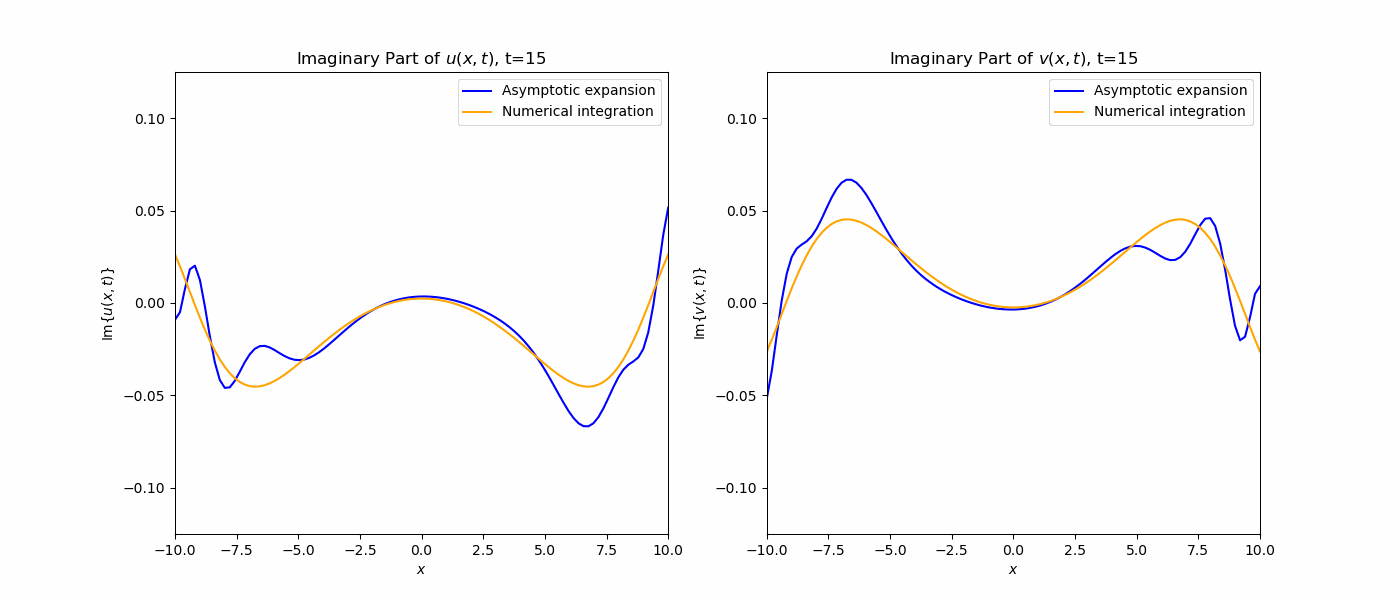

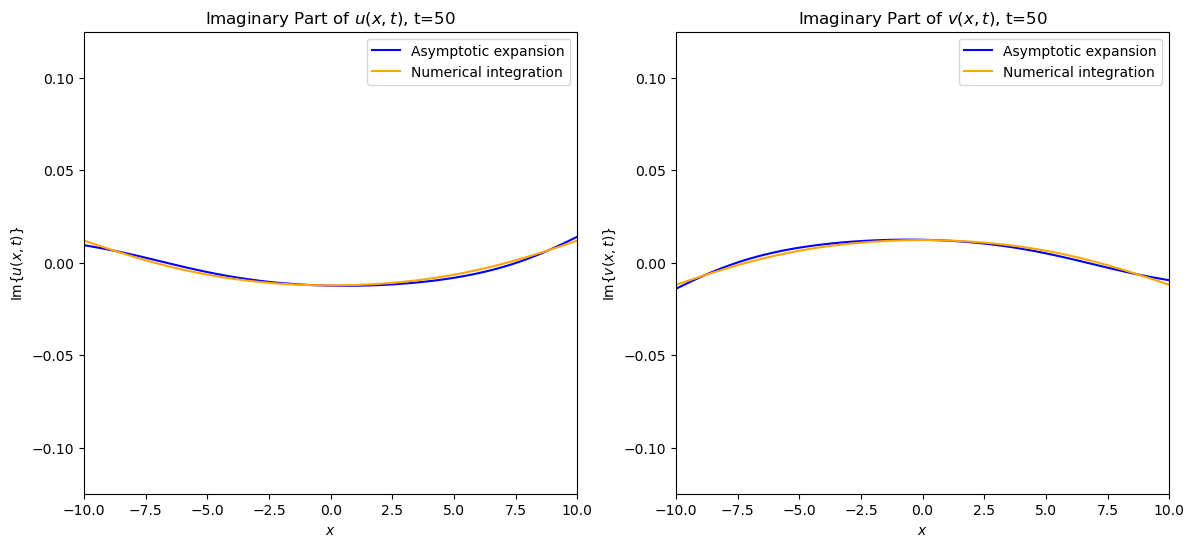

In [126]:
# Time values
time_values = np.arange(15, 51)  # From 15 to 50 inclusive

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Initialize empty plots for u(x,t) and v(x,t)
u_line_asymp, = ax1.plot([], [], label='Asymptotic expansion', color='blue')
u_line_numerical, = ax1.plot([], [], label='Numerical integration', color='orange')
v_line_asymp, = ax2.plot([], [], label='Asymptotic expansion', color='blue')
v_line_numerical, = ax2.plot([], [], label='Numerical integration', color='orange')

# Set up plot limits and labels
ax1.set_xlim(x_values[0], x_values[-1])
ax1.set_ylim(-A/2, +A/2)
ax1.set_title(f'Imaginary Part of $u(x,t)$')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\text{Im}\left\{u(x,t)\right\}$')
ax1.legend()

ax2.set_xlim(x_values[0], x_values[-1])
ax2.set_ylim(-A/2, +A/2)
ax2.set_title(f'Imaginary Part of $v(x,t)$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\text{Im}\left\{v(x,t)\right\}$')
ax2.legend()


# Update function for each frame in the animation
def update(t):
    u_values = compute_integral(u_f, x_values, t)
    u_values_numerical = numerical_integration_u(x_values, t, A, m)
    v_values = compute_integral(v_f, x_values, t)
    v_values_numerical = numerical_integration_v(x_values, t, A, m)

    u_line_asymp.set_data(x_values, u_values.imag)
    u_line_numerical.set_data(x_values, u_values_numerical.imag)
    v_line_asymp.set_data(x_values, v_values.imag)
    v_line_numerical.set_data(x_values, v_values_numerical.imag)

    ax1.set_title(f'Imaginary Part of $u(x,t)$, t={t}')
    ax2.set_title(f'Imaginary Part of $v(x,t)$, t={t}')

    return u_line_asymp, u_line_numerical, v_line_asymp, v_line_numerical


# Create the animation
ani = FuncAnimation(fig, update, frames=time_values, blit=True, repeat=False)

# Save the animation as a gif using Pillow
ani.save('animation_imaginary.gif', writer='pillow', fps=10)

# Display the GIF in the notebook
display(Image(filename='animation_imaginary.gif'))